# Comunicação entre plantas (Sim, você leu certo)

O dataset escolhido para este trabalho contém informações de sinais biológicos emitidos por plantas, juntamente com fatores ambientais, como umidade do solo e luz solar.

Disponível em: https://www.kaggle.com/datasets/efeyldz/plant-communication-dataset-classification/data

O objetivo é classificar o tipo de mensagem que a planta está (provavelmente) tentando transmitir com os respectivos sinais emitidos, sendo "Warning", "Contentment", "Distress" e "Invitation". 

## 📋 Características do Dataset

- **Plant_ID**: Identificador único da planta (usado para rastreamento, não para modelagem).  

- **Leaf_Vibration_Hz**: Frequência das vibrações sutis das folhas (medida em Hertz).  

- **Pollen_Scent_Complexity**: Pontuação (1–10) que avalia a complexidade do cheiro do pólen da 
planta.  
- **Bioluminescence_Intensity_Lux**: Intensidade da luz emitida pela planta (em Lux).  

- **Root_Signal_Strength_mV**: Intensidade do sinal elétrico medido nas raízes da planta (em 
milivolts).  
- **Growth_Rate_mm_day**: Velocidade de crescimento da planta (em milímetros por dia).  

- **Ambient_Temperature_C**: Temperatura ambiente ao redor da planta (em °C).  

- **Soil_Moisture_Level**: Nível de umidade do solo, variando de 0 (seco) a 1 (totalmente saturado).  

- **Sunlight_Exposure_Hours**: Número de horas de exposição ao sol recebidas no último dia.  

- **Symbiotic_Fungus_Present**: Indica se há presença de fungo simbiótico nas raízes (0 = Não, 1 = 
Sim).  
- **Plant_Message_Type**: Variável alvo — tipo de mensagem emitida pela planta (Categorias: Warning: *Alerta*, Contentment: *Contentamento*, Distress: *Sofrimento*, Invitation: *Convite*).


## Interpretando o dataset

In [122]:
import pandas as pd
dataframe = pd.read_csv("plant_communication_dataset.csv")

In [123]:
dataframe.head()

,Plant_ID,Leaf_Vibration_Hz,Pollen_Scent_Complexity,Bioluminescence_Intensity_Lux,Root_Signal_Strength_mV,Growth_Rate_mm_day,Ambient_Temperature_C,Soil_Moisture_Level,Sunlight_Exposure_Hours,Symbiotic_Fungus_Present,Plant_Message_Type
0,PLANT_0001,57.45,7,2.70,117.61,2.25,25.6,0.27,9.5,0,Distress
1,PLANT_0002,47.93,1,21.55,208.47,4.46,15.3,0.28,9.9,0,Warning
2,PLANT_0003,59.72,8,3.53,193.31,5.05,34.3,0.41,8.9,0,Invitation
3,PLANT_0004,72.85,3,5.90,149.65,1.53,23.6,0.36,5.8,1,Distress
4,PLANT_0005,46.49,6,58.61,135.20,4.89,24.3,0.82,5.2,1,Contentment


In [124]:
print(dataframe.shape)

(1000, 11)


## Tamanho do dataset
1000 registros e 10 colunas

## Vamos ver agora a proporção de cada classe

In [125]:
columns = dataframe.columns.to_list()
for col in columns:
    print(dataframe[col].value_counts(normalize=True) * 100)
    print("-----------")

Plant_ID
PLANT_1000    0.1
PLANT_0001    0.1
PLANT_0002    0.1
PLANT_0003    0.1
PLANT_0004    0.1
             ... 
PLANT_0012    0.1
PLANT_0013    0.1
PLANT_0014    0.1
PLANT_0015    0.1
PLANT_0016    0.1
Name: proportion, Length: 1000, dtype: float64
-----------
Leaf_Vibration_Hz
41.35    0.3
33.78    0.3
53.36    0.3
59.49    0.3
52.95    0.3
        ... 
47.60    0.1
49.71    0.1
34.96    0.1
49.72    0.1
45.18    0.1
Name: proportion, Length: 910, dtype: float64
-----------
Pollen_Scent_Complexity
5     11.1
4     10.9
2     10.5
6     10.2
10    10.1
7      9.9
9      9.6
8      9.4
3      9.3
1      9.0
Name: proportion, dtype: float64
-----------
Bioluminescence_Intensity_Lux
0.63     0.4
2.78     0.4
6.27     0.3
0.06     0.3
1.42     0.3
        ... 
3.18     0.1
13.38    0.1
2.79     0.1
9.25     0.1
2.22     0.1
Name: proportion, Length: 898, dtype: float64
-----------
Root_Signal_Strength_mV
208.05    0.3
145.40    0.2
211.33    0.2
182.10    0.2
151.34    0.2
         ..

A nossa variável alvo é a *Plant_Message_Type*, cujo a proporção é:

Contentment: 40.8

Warning: 21.2

Distress: 19.3

Invitation: 18.7

## Onde há valores nulos?

In [126]:
print(dataframe.isnull().sum())

Plant_ID                         0
Leaf_Vibration_Hz                0
Pollen_Scent_Complexity          0
Bioluminescence_Intensity_Lux    0
Root_Signal_Strength_mV          0
Growth_Rate_mm_day               0
Ambient_Temperature_C            0
Soil_Moisture_Level              0
Sunlight_Exposure_Hours          0
Symbiotic_Fungus_Present         0
Plant_Message_Type               0
dtype: int64


## Transformação, tratamento e limpeza dos dados

In [127]:
# O identificador da planta não impacta em nada
dataframe.drop(columns=["Plant_ID"], inplace=True)

# Tratando as variáveis categoricas
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
dataframe["Plant_Message_Type"] = encoder.fit_transform(dataframe[["Plant_Message_Type"]])

dataframe.head()




,Leaf_Vibration_Hz,Pollen_Scent_Complexity,Bioluminescence_Intensity_Lux,Root_Signal_Strength_mV,Growth_Rate_mm_day,Ambient_Temperature_C,Soil_Moisture_Level,Sunlight_Exposure_Hours,Symbiotic_Fungus_Present,Plant_Message_Type
0,57.45,7,2.70,117.61,2.25,25.6,0.27,9.5,0,1.0
1,47.93,1,21.55,208.47,4.46,15.3,0.28,9.9,0,3.0
2,59.72,8,3.53,193.31,5.05,34.3,0.41,8.9,0,2.0
3,72.85,3,5.90,149.65,1.53,23.6,0.36,5.8,1,1.0
4,46.49,6,58.61,135.20,4.89,24.3,0.82,5.2,1,0.0


## Divisão do conjunto de treinamento e teste

In [128]:
# Coluna alvo, ou seja, o que quero identificar
y = dataframe["Plant_Message_Type"]

# Dropando a coluna alvo
dataframe.drop(columns=["Plant_Message_Type"], inplace=True)

X = dataframe.values

# Sem a coluna ID e Plant_Message_Type
print(dataframe.shape)

(1000, 9)


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

## Criação do modelo MLPClassifier

Como o problema é tentar identificar o tipo de mensagem que a planta está tentando passar, vamos usar um classificador.

In [130]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state=42, max_iter=500).fit(X_train, y_train)

y_pred = mlpc.predict(X_test)
y_pred.size

/home/kelvin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


250

## Avaliação do modelo

In [131]:
# Capturando as labels originais
labels = encoder.categories_[0]

In [132]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

              precision    recall  f1-score   support

 Contentment       0.43      0.55      0.48       106
    Distress       0.28      0.24      0.26        45
  Invitation       0.15      0.12      0.14        40
     Warning       0.23      0.15      0.18        59

    accuracy                           0.33       250
   macro avg       0.27      0.27      0.26       250
weighted avg       0.31      0.33      0.31       250



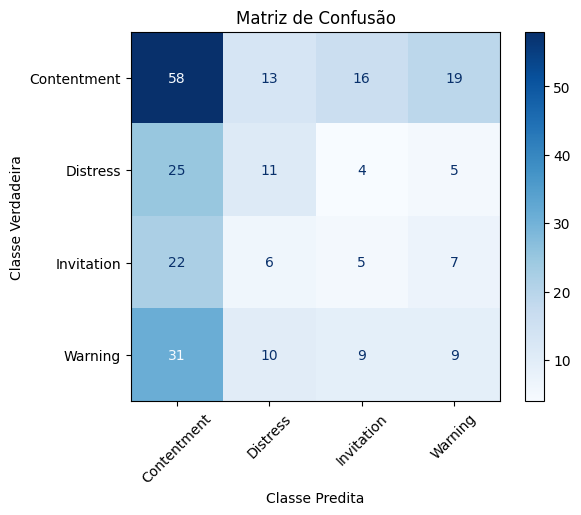

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

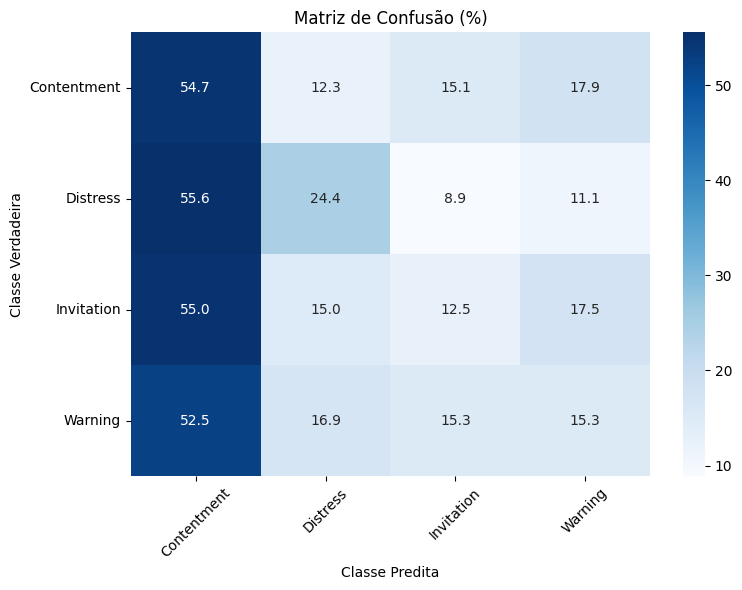

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Converter para porcentagens
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Matriz de Confusão (%)")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Resultado da parte 1: Horrível

O dataset está um pouco desbalanceado, o modelo prevê muito a mensagem de "Contentment", porém, como podemos observar, a precisão para as classes está extremamente baixo, quase se assimilando como um chute aleatório.

Confesso que gostei do tema, e vou tentar arrumar na parte 2 alguma forma de contornar esse problema de desbalanceamento. Pesquisando eu vi sobre a função SMOTE, que é justamente para lidar com problemas de desbalanceamento em modelos de classificação.

Na parte 2 irei testar outros tipos de modelos, além do MLPClassifier.

Vamos ver se na parte 2, com a definição dos hiperparâmetros, isso é resolvido no modelo atual.

# Parte 2

Vamos utilizar o Keras, em primeiro lugar, sem a utilização de hiperparâmetros.

### Separação do conjunto de treinamento e validação (70% e 30%)

In [135]:
from tensorflow import keras
X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size = 0.30,
                                                    random_state = 7)

### Codificando os rótulos

In [136]:
encoder = keras.layers.CategoryEncoding(
  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_train_val)),
  output_mode="one_hot"
)

y_train_encoded = encoder(y_train_val)


encoder = keras.layers.CategoryEncoding(
  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_validation)),
  output_mode="one_hot"
)

y_validation_encoded = encoder(y_validation)

### Modelo Base

In [137]:
model = keras.Sequential([
    keras.layers.Input((9,)), # 9 variaveis
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(units=4, activation="softmax") # 4 tipos de mensagens da planta
])

### Preparação do modelo

In [138]:
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

### Treinamento do modelo

In [139]:
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128)

Epoch 1/500


5/5 - 1s - 139ms/step - f1_score: 0.2535 - loss: 1.3577 - val_f1_score: 0.2418 - val_loss: 1.3284
Epoch 2/500
5/5 - 0s - 15ms/step - f1_score: 0.2265 - loss: 1.3300 - val_f1_score: 0.2418 - val_loss: 1.3263
Epoch 3/500
5/5 - 0s - 14ms/step - f1_score: 0.2303 - loss: 1.3172 - val_f1_score: 0.2418 - val_loss: 1.3245
Epoch 4/500
5/5 - 0s - 14ms/step - f1_score: 0.2303 - loss: 1.3089 - val_f1_score: 0.2512 - val_loss: 1.3231
Epoch 5/500
5/5 - 0s - 14ms/step - f1_score: 0.2300 - loss: 1.2995 - val_f1_score: 0.2757 - val_loss: 1.3230
Epoch 6/500
5/5 - 0s - 14ms/step - f1_score: 0.2667 - loss: 1.2931 - val_f1_score: 0.2934 - val_loss: 1.3252
Epoch 7/500
5/5 - 0s - 14ms/step - f1_score: 0.2540 - loss: 1.2878 - val_f1_score: 0.2879 - val_loss: 1.3229
Epoch 8/500
5/5 - 0s - 14ms/step - f1_score: 0.2556 - loss: 1.2822 - val_f1_score: 0.2927 - val_loss: 1.3248
Epoch 9/500
5/5 - 0s - 15ms/step - f1_score: 0.2876 - loss: 1.2768 - val_f1_score: 0.2939 - val_loss: 1.3240
Epoch 10/500
5/5 - 0s - 14ms/s

### Avaliação do modelo base

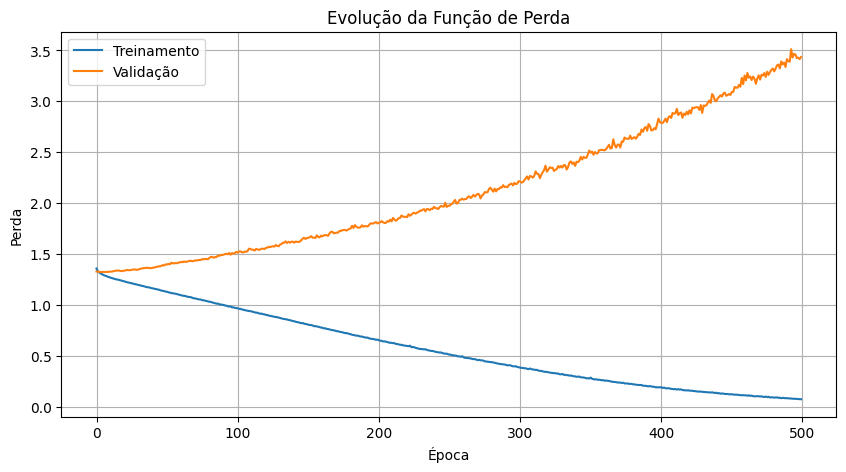

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

Como podemos ver no gráfico da função perda, o modelo está aprendendo cada vez melhor a memorizar os dados de treinamento, porém, a linha laranja indica uma subida abrupta, ou seja, o mesmo está falhando quando se depara com novos dados.

O que significa... OVERFITTING!

Lembrando que, quanto menor a perda, melhor o modelo está aprendendo.

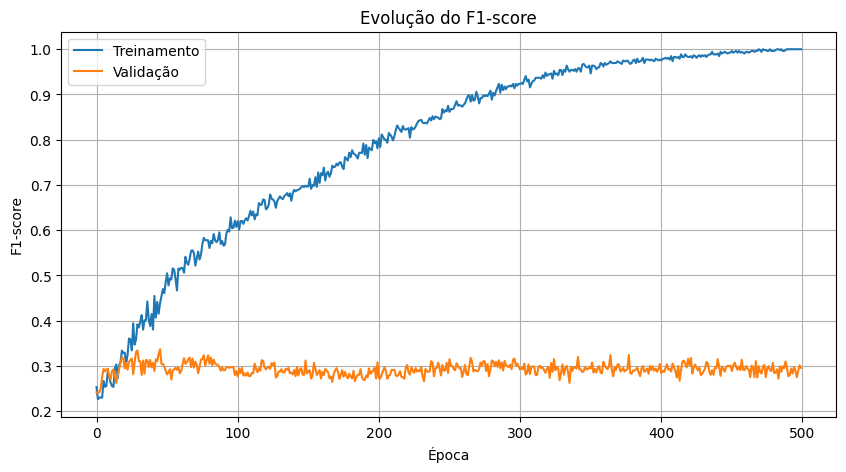

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

Olhando o gráfico da F1-Score, temos que o modelo acerta muito bem os dados de treinamento, porém, para novos dados não há nenhum ganho.